# NETFLIX DATA ANALYSIS


In an era where streaming platforms have become an integral part of our entertainment
landscape, understanding content trends and performance metrics is crucial for content creators
and platform providers. With million subscribers worldwide, Netflix stands out as one of the
leading players in the streaming industry. This raw data contains Unlabelled text data of around
9000 Netflix Shows and Movies along with Full details like Cast, Release Year, Rating,
Description, etc.


In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset

df=pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#finding rows and columns

df.shape

(8807, 12)

###### There are 8807 rows and 12 columns.


In [5]:
#to show no. of elemnents in the dataset
df.size

105684

In [6]:
#shows the counts and datatypes of our variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce', infer_datetime_format=True)

# Display the first 3 rows
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [8]:
#finding the duplicate record
df[df.duplicated(keep=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


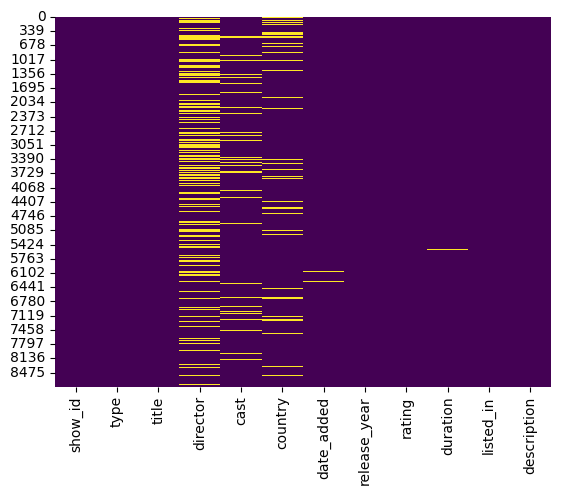

In [9]:
 #showing the null values with heatmap

sns.heatmap(df.isnull(), cmap='viridis', cbar= False)
plt.show()

In [10]:
# Filling missing values in specific columns with "not specified"
df["director"].fillna("not specified", inplace=True)
df["cast"].fillna("not specified", inplace=True)
df["country"].fillna("not specified", inplace=True)

# Dropping any remaining rows with missing values in other columns
df.dropna(inplace=True)

# Checking for remaining missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.shape

(8702, 12)

# EDA:

In [12]:
#use of rcParams to customize the plots.

sns.set_style("darkgrid")
plt.rcParams["font.size"]=14
plt.rcParams["figure.figsize"]=(10,7)
plt.rcParams["figure.facecolor"]="#FFE5B4"


# 1) Type of content types(Movies & TV Shows) mostly released.


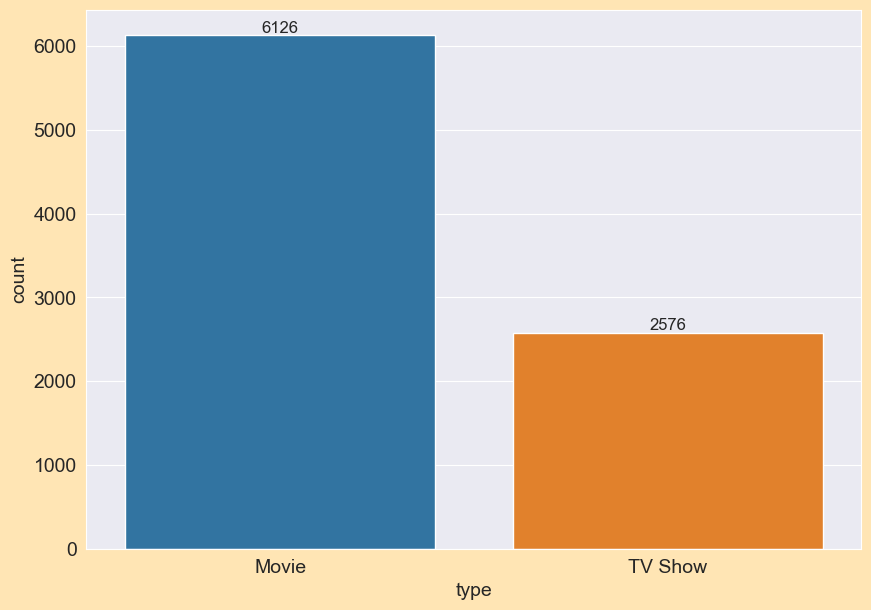

In [13]:
 ax=sns.countplot(x="type", data=df)
sns.set(rc={"figure.figsize": (4, 4)})
for bars in ax.containers:
    ax.bar_label(bars)

###### From the above graph, we can see that movie type of content is released more than TV Show type of content.

# 2) Most number of contents released in years

In [14]:
#counting the number of contents are released in a particular year.

df["release_year"].value_counts()

2018    1140
2019    1030
2017    1014
2020     953
2016     878
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

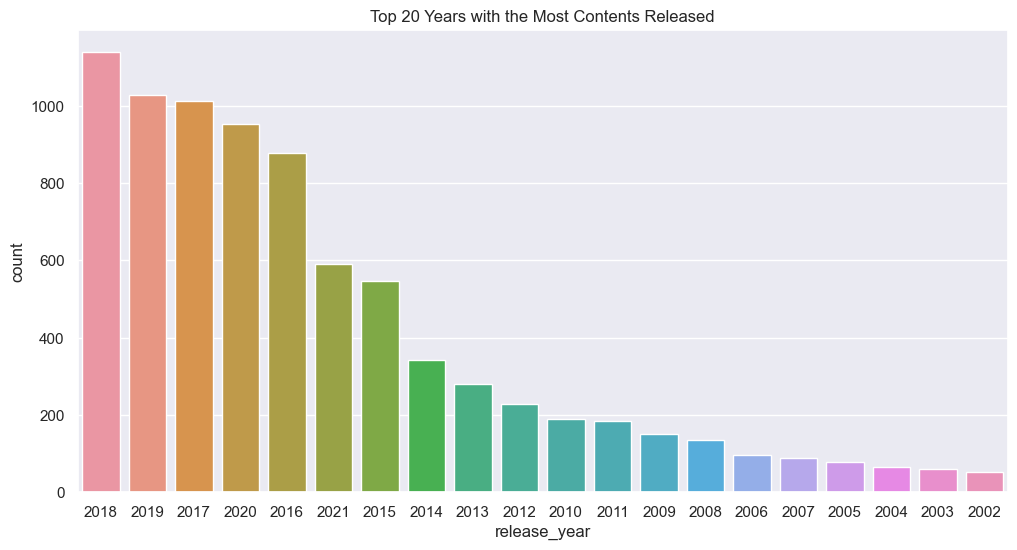

In [15]:
top_20_years = df["release_year"].value_counts().nlargest(20).index

plt.figure(figsize=(12, 6))
sns.countplot(x="release_year", order=top_20_years, data=df)
plt.title("Top 20 Years with the Most Contents Released")
plt.show()

###### From the above graph, we can see that maximum number of contents 

# 3) Maximum type of contents mostly released in years

In [16]:
## Creating DataFrames 'type_movies' and 'type_tv_shows' by
#filtering rows where the 'type' column is equal to "Movie" and "TV Show".

type_movies=df[df[ "type" ]=="Movie"]
type_tv_shows=df[df[ "type" ]=="TV Show"]

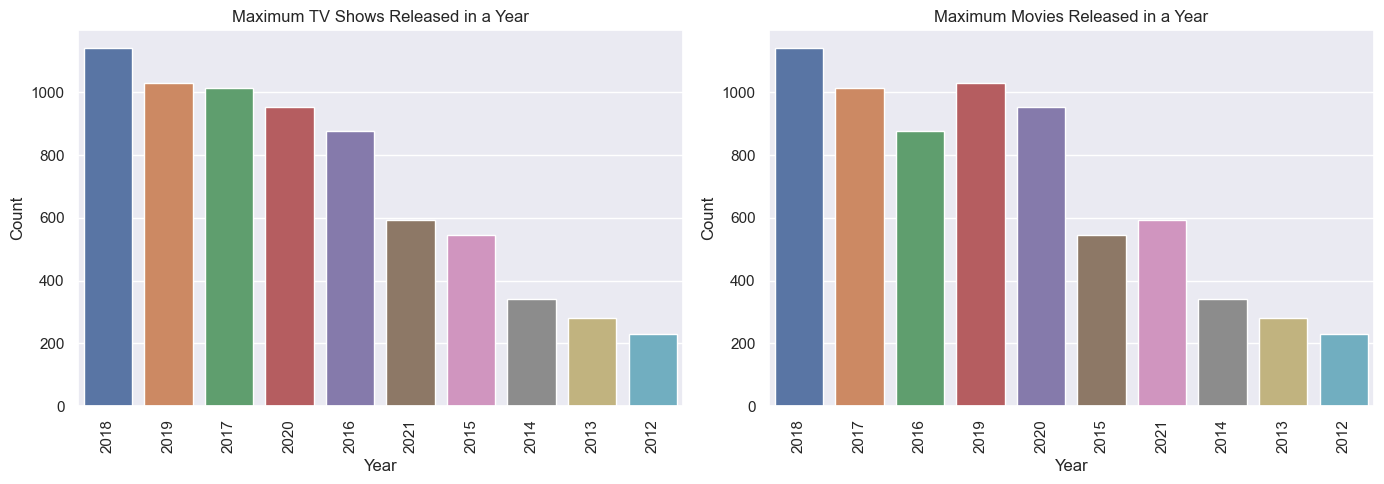

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1 - Maximum TV Shows Released in a Year
sns.countplot(x="release_year", data=df, order=df["release_year"].value_counts().nlargest(10).index, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Maximum TV Shows Released in a Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Count")

# Plot 2 - Maximum Movies Released in a Year
sns.countplot(x="release_year", data=df, order=type_movies["release_year"].value_counts().nlargest(10).index, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title("Maximum Movies Released in a Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Count")

plt.tight_layout()

plt.show()

###### From the above we can see that both movies and tv shows are mostly released in 2018.

# 4) Countries with maximum number of contents released

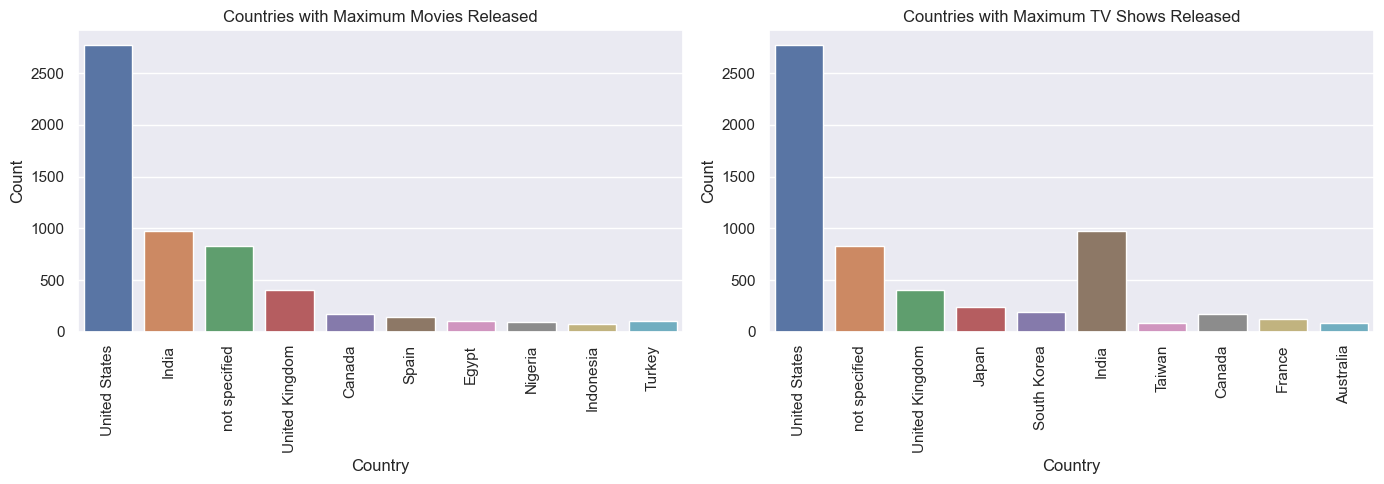

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1 - Countries with Maximum Movies Released
sns.countplot(x="country", data=df, order=type_movies["country"].value_counts().nlargest(10).index, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Countries with Maximum Movies Released")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Count")

# Plot 2 - Countries with Maximum TV Shows Released
sns.countplot(x="country", data=df, order=type_tv_shows["country"].value_counts().nlargest(10).index, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title("Countries with Maximum TV Shows Released")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

###### From the above, we can see that maximum contents released in United States, India and United Kingdom.

# 5) Top 10 Directors

In [19]:
df["director"].value_counts().head(10)

not specified             2538
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Youssef Chahine             12
Martin Scorsese             12
Jay Chapman                 12
Name: director, dtype: int64

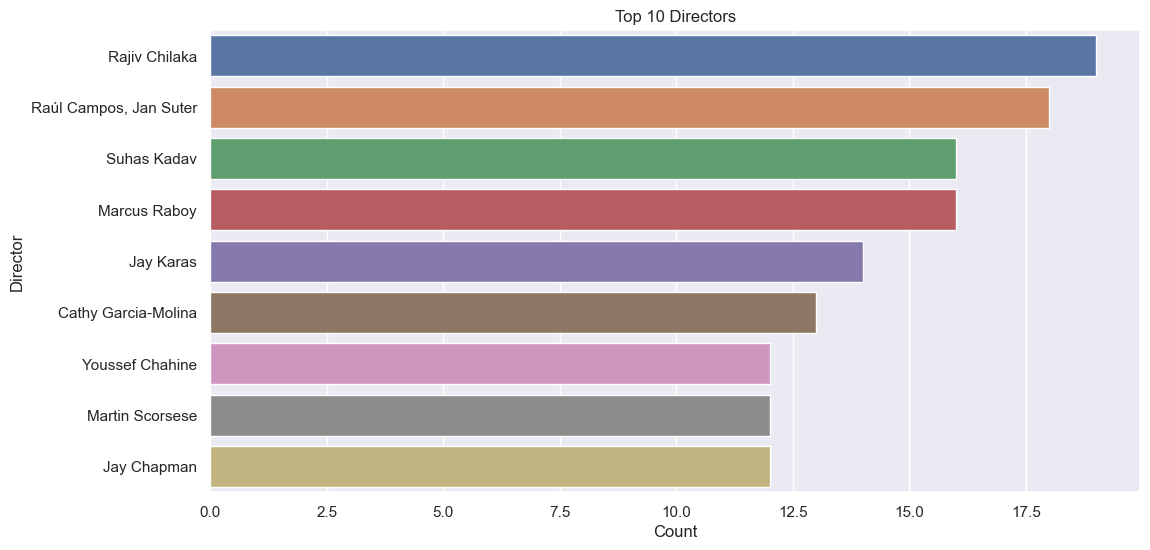

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(y="director", order=df["director"].value_counts().index[1:10], data=df)
plt.title("Top 10 Directors")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()

###### From the above, we can see that the top director is Rajiv Chilaka.

# 6) Top 10 Contents Ratings

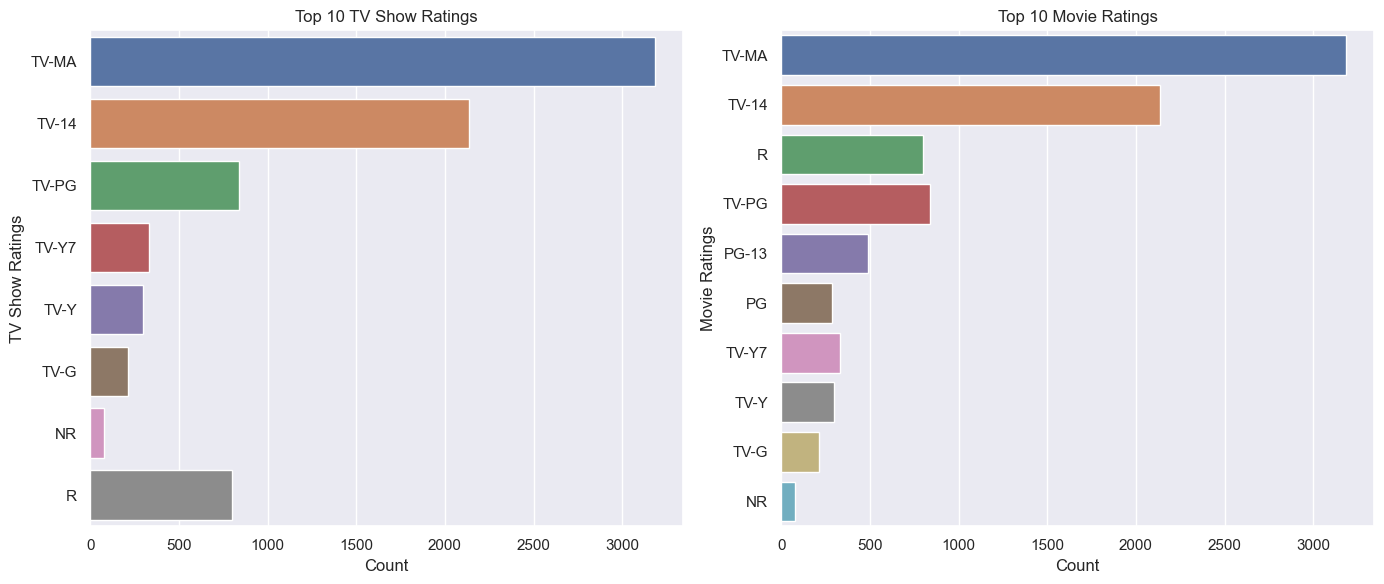

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1 - Top TV Show Ratings
sns.countplot(y="rating", order=type_tv_shows["rating"].value_counts().index[:10], ax=axes[0],data=df)
axes[0].set_xlabel('Count')
axes[0].set_ylabel('TV Show Ratings')
axes[0].set_title('Top 10 TV Show Ratings')

# Plot 2 - Top Movie Ratings
sns.countplot(y="rating", order=type_movies["rating"].value_counts().index[:10], ax=axes[1],data=df)
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Movie Ratings')
axes[1].set_title('Top 10 Movie Ratings')

plt.tight_layout()
plt.show()

###### From the above we can see that for tv shows, the top ratings are TV-MA, TV-14 and TV-PG. From the above we can see that for movies, the top ratings are TV-MA, TV-14 and R. "MA"standas for mature audiences. And TV-MA rating is top for both type of contents. So, below 18 years of age should not watch. Second rating for the contents is TV-14 that the contents are mainly for over 14 years of age. Below 14 age of children is not recommended to watch without parental guidance. Third rating for movies is R which means restricted movies and it is highly prohibited for under 18 years of age.


# 7) Top 10 Genres on Netflix



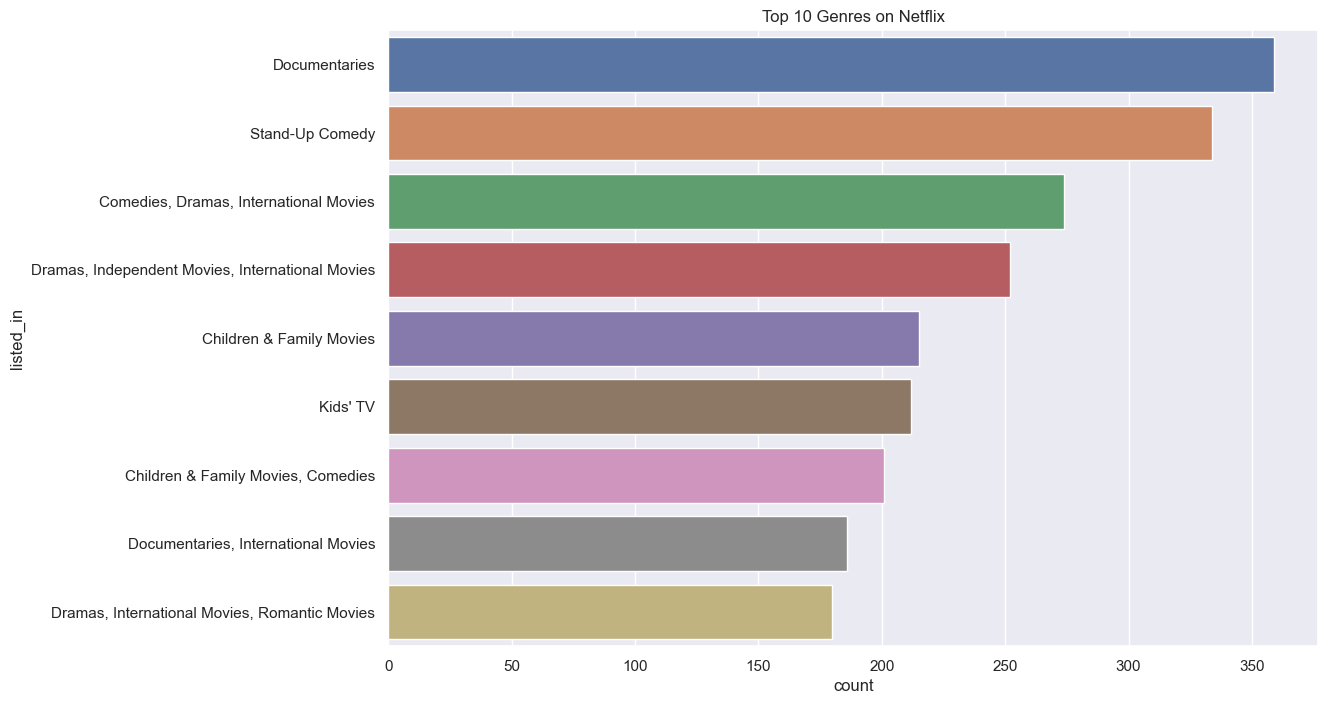

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(y="listed_in", order=df["listed_in"].value_counts().index[1:10],data=df)
plt.title("Top 10 Genres on Netflix")
plt.show()

###### From the above we can see that the top genre on netflix is Dramas, International Movies.


# 8) Most popular contents genre

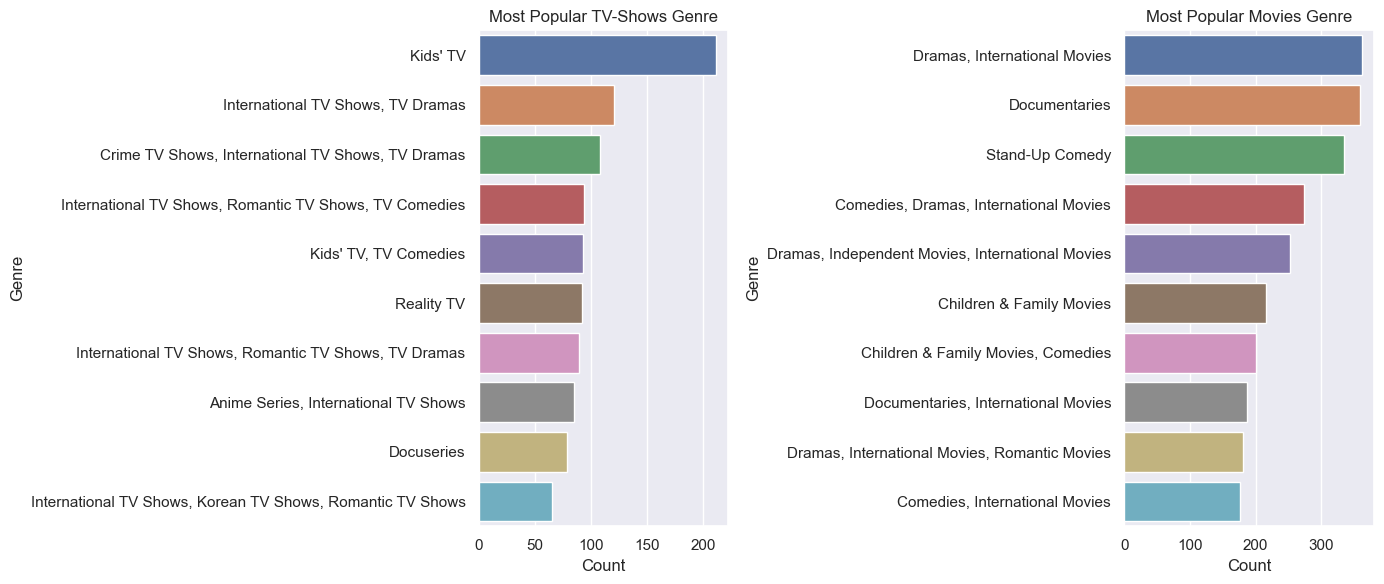

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1 - Most Popular TV-Shows Genre
sns.countplot(y="listed_in", order=type_tv_shows["listed_in"].value_counts().index[:10], ax=axes[0],data=df)
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Genre')
axes[0].set_title('Most Popular TV-Shows Genre')

# Plot 2 - Most Popular Movies Genre
sns.countplot(y="listed_in", order=type_movies["listed_in"].value_counts().index[:10], ax=axes[1],data=df)
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Genre')
axes[1].set_title("Most Popular Movies Genre")

plt.tight_layout()

plt.show()

###### From the above we can see for TV Shows, the most popular genre is Kids' TV. But for Movies, the most in popular genre are Dramas and International Movies.

# 9) Maximum and minumum duration of Movies

In [24]:
#creating the two different columns from duration column using str.split


df[["Minutes", "Unit"]] = df["duration"].str.split(" ", expand=True)


In [25]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,Unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,not specified,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",not specified,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8702 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8702 non-null   object        
 1   type          8702 non-null   object        
 2   title         8702 non-null   object        
 3   director      8702 non-null   object        
 4   cast          8702 non-null   object        
 5   country       8702 non-null   object        
 6   date_added    8702 non-null   datetime64[ns]
 7   release_year  8702 non-null   int64         
 8   rating        8702 non-null   object        
 9   duration      8702 non-null   object        
 10  listed_in     8702 non-null   object        
 11  description   8702 non-null   object        
 12  Minutes       8702 non-null   object        
 13  Unit          8702 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 1019.8+ KB


In [27]:
# Convert the 'Minutes' column to numeric, and set errors to 'coerce'
df["Minutes"] = pd.to_numeric(df['Minutes'], errors='coerce')

# Display the maximum value in the 'Minutes' column
max_minutes = df["Minutes"].max()

print("Maximum Duration in Minutes:", max_minutes)

Maximum Duration in Minutes: 312


In [28]:
df["Minutes"].min()

1

In [29]:
df[(df["type"]=="Movie") & (df["Minutes"]==312)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,Unit
4253,s4254,Movie,Black Mirror: Bandersnatch,not specified,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312,min


###### From the above we can see that the maximum duration of movie is 312 minute and the minimum duration is 1 minute. And the name of the 312 minute duration movie is Black Miror Bandemnatch.

# Conclusion:

###### The following is the summary of insights we found:

1. More number of movies are released as compared to TV Shows in Netflix.

2. In 2018, maximum number of contents released.

3. Top director is Rajiv Chilaka.

4. Top countries where maximum contents released are United States, India and United Kingdom.

5. TV-MA is the top rating for both type of contents which means the contents are mostly for matured audiences.

6. Most popular genre are Dramas and International Movies.

7. The most popular genre is Kids' TV. and

8. Black Mirror Bandernatch is the longest duration movie.

9. Longest duration of movies is 312 min and shortest duration is 1 minute.